## CMIP6 model data using Pangeo catalog

In [83]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
%matplotlib inline

In [84]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [85]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['Omon','SImon'], 
                 #grid_label=['gr1'],
                 variable_id=['siconc','no3','areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125


In [86]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [87]:
list(dset_dict.keys())

['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn',
 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']

In [88]:
si = dset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn']

In [89]:
si

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, member_id: 6, time: 1980,
                  axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    type         |S255 ...
  * member_id    (member_id) <U9 'r1i1p1f2' 'r3i1p1f2' ... 'r11i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    siconc       (member_id, time, y, x) float32 dask.array<chunksize=(1, 600, 294, 362), meta=np.ndarray>
Attributes: (12/48)
    source_id:               CNRM-ESM2-1
    description:             CMIP6 historical
    realm:                   seaIce
    contact:                 contact.cmip@meteo.fr
    parent_source_id:        CNRM-ESM2-1
    arpege_minor_version:    6.3.2
    ...                      ...
    Conventions:             CF-1.7 CMIP-6.2
    xios_commit:             1442-shuffle
    grid_label:              gn
    source_type:             AOGCM BGC AER CHEM
    variable_id:             siconc
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn

In [90]:
no3 = dset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']

In [59]:
no3.time.values

array([cftime.DatetimeGregorian(1850, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2014, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 12, 16, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)

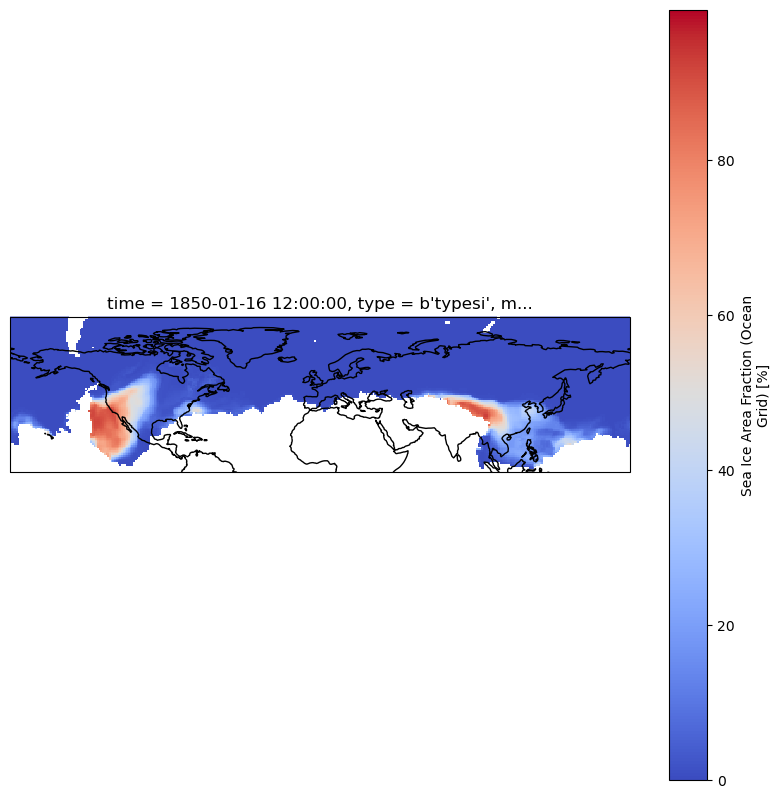

In [96]:
fig = plt.figure(1, figsize=[10,10])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
si.siconc.isel(member_id=0).sel(
    time = cftime.DatetimeGregorian(1850, 1, 16), method = 'nearest').squeeze().plot.pcolormesh(
    ax=ax, cmap='coolwarm')

#dset['tas'].isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')

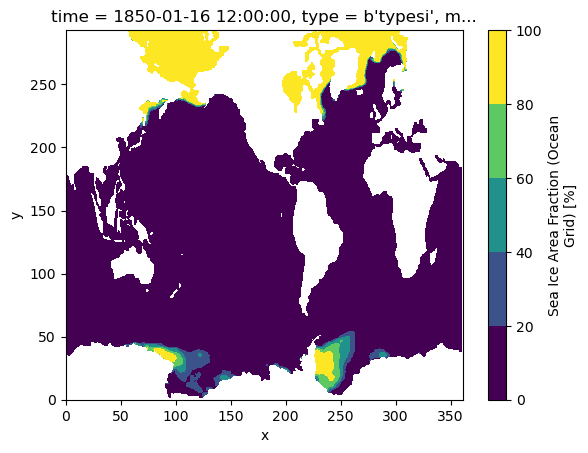

In [97]:
# select a specific time
si.siconc.isel(member_id=0).sel(time = cftime.DatetimeGregorian(1850, 1, 16), 
                                method = 'nearest').squeeze().plot.contourf()


In [100]:
si.lat.values

array([[-78.78907776, -78.78907776, -78.78907776, ..., -78.78907776,
        -78.78907776, -78.78907776],
       [-78.59297943, -78.59297943, -78.59297943, ..., -78.59297943,
        -78.59297943, -78.59297943],
       [-78.39350128, -78.39350128, -78.39350128, ..., -78.39350128,
        -78.39350128, -78.39350128],
       ...,
       [ 50.00502014,  50.00502014,  50.22440338, ...,  50.22440338,
         50.00502014,  50.00502014],
       [ 50.01094055,  50.01094055,  50.22936249, ...,  50.22936249,
         50.01094055,  50.01094055],
       [ 50.01094055,  50.01094055,  50.22936249, ...,  50.22936249,
         50.01094055,  50.01094055]])

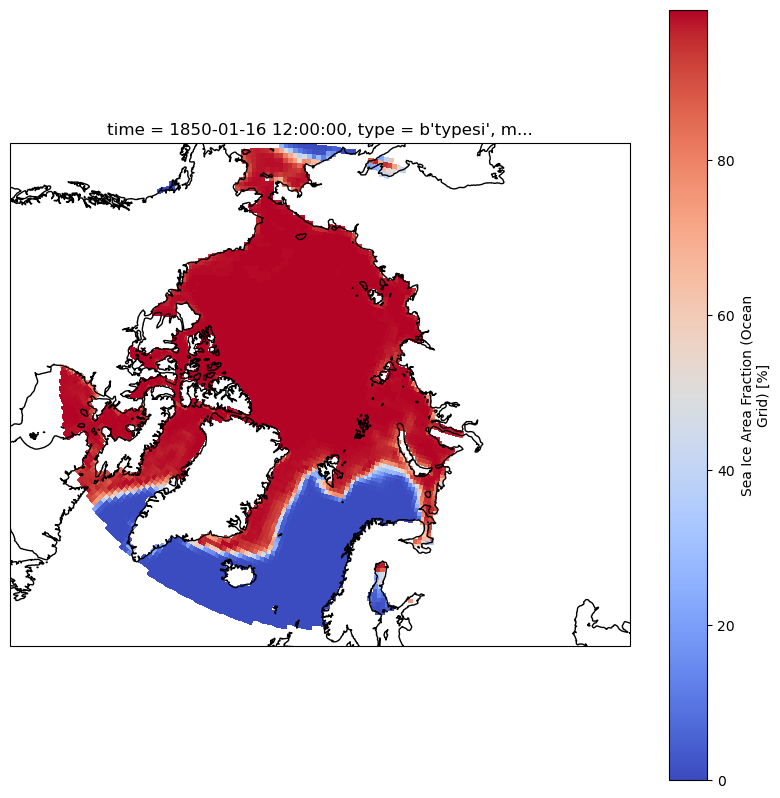

In [ ]:
fig = plt.figure(1, figsize=[10,10])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#dset['tas'].isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')
si.siconc.isel(member_id=0).sel(
    time = cftime.DatetimeGregorian(1850, 1, 16), method = 'nearest'
).where(si.lat>= 60, drop = True).squeeze().plot.pcolormesh(x='lon', y='lat',
    ax=ax, 
    cmap='coolwarm',
    transform = ccrs.PlateCarree()
)


In [107]:
#si_period = si.sel(time= slice('1850-01-01','2014-12-01'))

In [108]:
si_GL = si.where((si.lon>=-10) & (si.lon<=10) & (si.lat <=85 )  & (si.lat >= 70),drop = True)

In [115]:
# average over the ensemble means
si_GL_mean = si_GL['siconc'].mean(dim = ['member_id'], keep_attrs=True)

In [121]:
si_GL_mean

<xarray.DataArray 'siconc' (time: 1979, y: 29, x: 18)>
dask.array<mean_agg-aggregate, shape=(1979, 29, 18), dtype=float32, chunksize=(600, 29, 18), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
    lon      (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
  * time     (time) object 1850-01-16 12:00:00 ... 2014-11-16 00:00:00
    type     |S6 b'typesi'
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello
    cell_methods:        area: mean where sea time: mean
    description:         Sea Ice Area Fraction (Ocean Grid)
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Sea Ice Area Fraction (Ocean Grid)
    online_operation:    average
    standard_name:       sea_ice_area_fraction
    units:               %

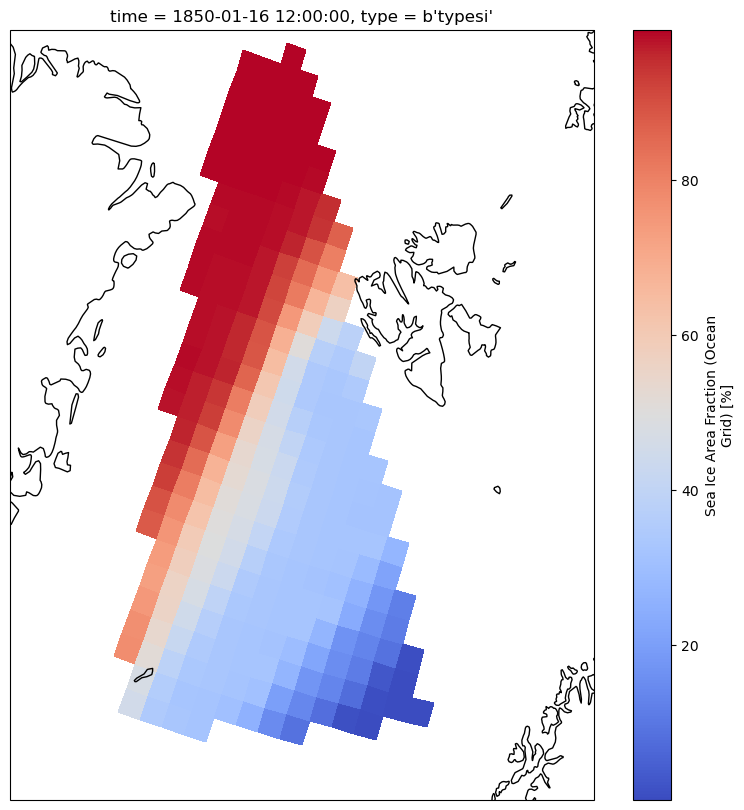

In [120]:
fig = plt.figure(1, figsize=[10,10])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.NorthPolarStereo())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#dset['tas'].isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')
si_GL_mean.sel(
    time = cftime.DatetimeGregorian(1850, 1, 16), method = 'nearest'
).squeeze().plot.pcolormesh(x='lon', y='lat',
    ax=ax, 
    cmap='coolwarm',
    transform = ccrs.PlateCarree()
)

In [127]:
si_GL_mean.time

<xarray.DataArray 'time' (time: 1979)>
array([cftime.DatetimeGregorian(1850, 1, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1850, 3, 16, 12, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2014, 9, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 10, 16, 12, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2014, 11, 16, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-11-16 00:00:00
    type     |S6 b'typesi'
Attributes:
    axis:           T
    bounds:         time_bounds
    long_name:      Time axis
    standard_name:  time
    time_origin:    1850-01-01 00:00:00

In [128]:
si_monthly = si_GL_mean.groupby('time.month').mean(dim = ["time"],keep_attrs=True)

In [129]:
si_monthly

<xarray.DataArray 'siconc' (month: 12, y: 29, x: 18)>
dask.array<transpose, shape=(12, 29, 18), dtype=float32, chunksize=(1, 29, 18), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
    type     |S6 b'typesi'
    lat      (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello
    cell_methods:        area: mean where sea time: mean
    description:         Sea Ice Area Fraction (Ocean Grid)
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Sea Ice Area Fraction (Ocean Grid)
    online_operation:    average
    standard_name:       sea_ice_area_fraction
    units:               %

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


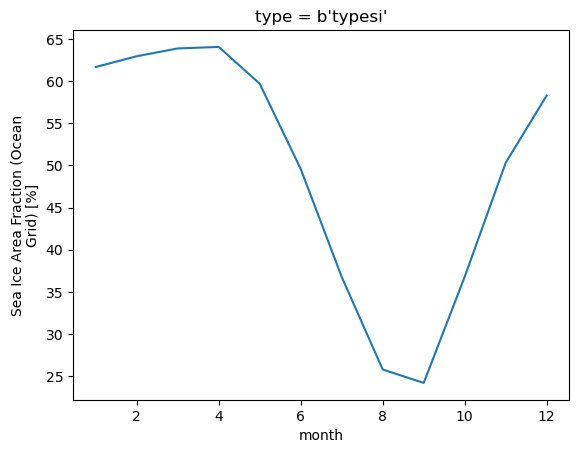

In [130]:
si_monthly.mean(dim = ["x","y"],keep_attrs=True).plot()

In [126]:
test = si_GL_mean.sel(time = '1850-01-01', method = 'nearest')#.mean(("x","y")).plot()

TypeError: '<' not supported between instances of 'str' and 'cftime._cftime.DatetimeGregorian'

In [39]:
for m in dset_dict:
    _ds = dset_dict[m]
    _ds = _ds.sel(time= slice('1850-01-01','2014-12-01'))
    dset_dict[m] = _ds